In [4]:
import numpy as np
import pandas as pd
from scipy import linalg
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("/home/bethtian/fintech545/FinTech545_Spring2025/Projects/Project01/problem6.csv")
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x491,x492,x493,x494,x495,x496,x497,x498,x499,x500
0,0.005315,0.000215,-0.000777,0.000418,-0.000687,0.000166,0.000935,-0.000445,0.000826,0.000146,...,0.001210,-0.000365,0.000155,-0.000881,-0.000284,-0.000149,0.000021,0.000237,0.001169,-0.000095
1,0.000215,0.001781,0.000094,-0.000109,-0.000438,0.000523,-0.000803,0.000242,0.000596,0.000129,...,0.000212,0.000256,-0.000106,-0.000080,0.000053,-0.000190,0.000009,0.000370,0.000707,0.000139
2,-0.000777,0.000094,0.004925,0.000320,-0.000592,0.000418,-0.000195,0.000543,0.001143,-0.000326,...,-0.000634,-0.000883,-0.000068,-0.000492,0.000222,-0.000761,-0.000269,-0.000335,0.000360,-0.000124
3,0.000418,-0.000109,0.000320,0.002545,-0.000323,-0.000106,0.000165,-0.000077,-0.000186,-0.000830,...,-0.000069,-0.000187,-0.000157,-0.000183,-0.000380,0.000310,0.000172,0.000148,0.000761,0.000240
4,-0.000687,-0.000438,-0.000592,-0.000323,0.009133,-0.001379,-0.002163,-0.000677,-0.000217,0.000413,...,0.001167,0.000394,-0.000137,0.000604,-0.000234,0.001203,0.000028,0.000201,-0.001461,0.000078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.000149,-0.000190,-0.000761,0.000310,0.001203,-0.000321,-0.000407,-0.000912,0.000609,0.000849,...,0.000940,-0.000986,-0.000787,-0.000047,-0.000178,0.008432,-0.000725,-0.000198,0.000197,-0.000221
496,0.000021,0.000009,-0.000269,0.000172,0.000028,-0.000077,-0.000186,-0.000232,-0.000394,-0.000022,...,0.000024,0.000218,0.000197,-0.000057,-0.000052,-0.000725,0.001514,0.000496,0.000397,-0.000023
497,0.000237,0.000370,-0.000335,0.000148,0.000201,-0.000211,0.000027,0.000181,0.000187,0.000257,...,0.000234,0.000097,0.000087,-0.000255,-0.000015,-0.000198,0.000496,0.002112,-0.000009,0.000150
498,0.001169,0.000707,0.000360,0.000761,-0.001461,-0.000144,-0.000473,0.000275,0.000231,-0.000506,...,-0.000674,0.000503,-0.000002,-0.000462,-0.000184,0.000197,0.000397,-0.000009,0.005130,0.000180


#  A. Simulate 10,000 draws using the Cholesky Root method.

In [6]:
def CheckSemi(matrix):
    #check all values are great or equal to 0
    if not np.all(matrix >= 0):
        print("The matrix is not positive semi-definite, because at least one value in the matrix is less than 0.")
        return False
    # Check the symmetry
    if not np.allclose(matrix,matrix.T):
        print("The matrix is not positive semi-definite, because the matrix is not symmetric")
        return False
    #calculate the eigen values
    eigenvalues = np.linalg.eigvals(matrix)
    if not np.all(eigenvalues >= -1e-10):
        print("The matrix is not positive semi-definite, because at least one value in eigen vectors is less than 0. ")
        return eigenvalues
    return True
CheckSemi(df)

The matrix is not positive semi-definite, because at least one value in the matrix is less than 0.


False

Because the covariance matrix is not positive semi-definite, I would like to use the near-psd method of Rebenato and Jackel to find th suitable matrix first. Then I will use the cholskey factorization to get the cholskey root.

In [7]:
def near_psd(a, epsilon=0.0):
    if isinstance(a, pd.DataFrame):
        a = a.to_numpy()
    
    n = a.shape[0]
    inv_sd = None
    out = a.copy()
    
    if not np.allclose(np.diag(out), np.ones(n)):
        inv_sd = np.diag(1.0 / np.sqrt(np.diag(out)))
        out = inv_sd @ out @ inv_sd

    vals, vecs = np.linalg.eigh(out)
    vals = np.maximum(vals, epsilon)
    
    T = 1.0 / np.sqrt(np.sum(vecs * vecs * vals, axis=1))
    T = np.diag(T)
    
    L = np.diag(np.sqrt(vals))
    
    B = T @ vecs @ L
    out = B @ B.T

    if inv_sd is not None:
        inv_sd = np.diag(1.0 / np.diag(inv_sd))
        out = inv_sd @ out @ inv_sd
    
    return out

In [8]:
psd_matrix = near_psd(df)
psd_matrix

array([[ 5.31525121e-03,  2.14788485e-04, -7.77084742e-04, ...,
         2.36865276e-04,  1.16869884e-03, -9.47533889e-05],
       [ 2.14788485e-04,  1.78131219e-03,  9.43013510e-05, ...,
         3.69698143e-04,  7.06805052e-04,  1.38553377e-04],
       [-7.77084742e-04,  9.43013510e-05,  4.92460751e-03, ...,
        -3.34953552e-04,  3.60227723e-04, -1.24091354e-04],
       ...,
       [ 2.36865276e-04,  3.69698143e-04, -3.34953552e-04, ...,
         2.11199625e-03, -8.61928497e-06,  1.50132446e-04],
       [ 1.16869884e-03,  7.06805052e-04,  3.60227723e-04, ...,
        -8.61928497e-06,  5.12984639e-03,  1.80406131e-04],
       [-9.47533889e-05,  1.38553377e-04, -1.24091354e-04, ...,
         1.50132446e-04,  1.80406131e-04,  5.87104243e-04]])

In [9]:
def cholesky_psd(a):
    if isinstance(a, pd.DataFrame):
        a = a.to_numpy()
    
    n = a.shape[0]
    root = np.zeros((n, n))
    
    for j in range(n):
        s = 0.0
        if j > 0:
            s = np.dot(root[j, :j], root[j, :j])
        
        temp = a[j, j] - s
        
        if -1e-8 <= temp <= 0:
            temp = 0.0
        
        root[j, j] = np.sqrt(temp)
        if root[j, j] != 0.0:
            ir = 1.0 / root[j, j]
            for i in range(j + 1, n):
                if j > 0:
                    s = np.dot(root[i, :j], root[j, :j])
                else:
                    s = 0.0
                root[i, j] = (a[i, j] - s) * ir
    
    return root

In [10]:
chol_root = cholesky_psd(psd_matrix)
chol_root

array([[ 0.07290577,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00294611,  0.04210264,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.01065876,  0.00298564,  0.06929707, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.00324892,  0.00855354, -0.00470239, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01603027,  0.01566595,  0.006989  , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00129967,  0.00338179, -0.00213632, ...,  0.        ,
         0.        ,  0.        ]])

In [11]:
def simulate_cholesky(L, n_samples=10000):
    start_time = time.time()

    n_dim = L.shape[0]
    Z = np.random.standard_normal((n_samples, n_dim))

    X = np.dot(Z, L.T)
    
    end_time = time.time()
    
    return X, end_time - start_time


In [12]:
chol_sample, chol_time = simulate_cholesky(chol_root)
print(f"The time of cholesky simulation is {chol_time} seconds")
chol_sample = pd.DataFrame(chol_sample)
chol_sample

The time of cholesky simulation is 0.5651495456695557 seconds


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.108956,0.080856,-0.001123,-0.051567,0.022594,0.106398,0.031043,-0.047724,-0.011477,0.000737,...,0.040978,0.154326,0.032050,-0.085992,0.029965,-0.127149,0.043432,0.031251,-0.011905,-0.032456
1,0.047789,0.000985,0.054649,-0.023087,-0.099522,0.027627,0.136382,-0.038019,-0.012381,-0.040205,...,0.031266,0.022969,-0.026297,0.004460,0.002950,0.038637,-0.077993,-0.059040,0.029846,-0.064995
2,0.054772,-0.024775,-0.126616,0.036911,0.070753,-0.086942,0.010161,0.001528,-0.058376,0.043855,...,0.138083,0.108849,0.001823,-0.051867,-0.000068,-0.109135,0.005696,0.017727,0.092071,0.051780
3,0.122528,0.013670,0.034172,0.008574,-0.135327,0.033004,0.000149,0.033508,0.150949,0.033577,...,-0.029804,-0.029623,0.024543,-0.005807,-0.000550,0.078102,-0.013934,-0.018504,0.047237,0.005880
4,-0.076257,0.000170,-0.085771,0.017025,-0.072693,-0.112195,0.019180,0.121269,0.014858,-0.050615,...,0.082263,0.023554,-0.011910,-0.055103,0.001607,-0.020884,-0.017594,-0.071591,0.005477,-0.002164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.108412,0.007746,-0.158192,-0.020491,-0.028206,0.038538,-0.094127,-0.069560,-0.084274,0.009145,...,-0.028000,-0.025539,0.022383,-0.034605,-0.017555,-0.031917,0.001703,0.019179,0.058336,0.015939
9996,0.138605,-0.048837,0.003816,0.015127,0.088267,-0.083279,0.158307,-0.042058,-0.060975,-0.042340,...,0.025718,-0.034820,-0.011088,0.013728,0.012723,-0.002122,-0.040510,-0.085097,0.008077,-0.040509
9997,-0.057361,-0.010373,-0.016494,-0.017083,-0.135820,0.020574,0.078139,-0.037469,-0.046165,0.020048,...,-0.031493,0.079324,-0.013789,0.034386,0.016002,0.136307,0.034658,0.041752,-0.043557,-0.051463
9998,-0.030852,-0.016211,0.010519,-0.024194,0.093342,0.010600,0.105192,0.060978,-0.038596,-0.104784,...,-0.065613,0.078491,0.018802,-0.042402,0.031432,-0.158621,0.033779,0.039645,-0.066081,0.001211


#  B. Simulate 10,000 draws using PCA with 75% variance

In [13]:
def simulate_pca(cov_matrix, variance_explained=0.75, n_samples=10000):
    start_time = time.time()
    
    eigenvals, eigenvecs = linalg.eigh(cov_matrix)
    
    idx = eigenvals.argsort()[::-1]
    eigenvals = eigenvals[idx]
    eigenvecs = eigenvecs[:, idx]
    
    total_var = np.sum(eigenvals)
    cum_var_ratio = np.cumsum(eigenvals) / total_var
    
    n_components = np.where(cum_var_ratio >= variance_explained)[0][0] + 1
    print(f"The components number to achieve the {variance_explained*100}% variance explanation is: {n_components}")
    
    selected_eigenvals = eigenvals[:n_components]
    selected_eigenvecs = eigenvecs[:, :n_components]
   
    Z = np.random.standard_normal((n_samples, n_components))
    
    X = np.dot(Z * np.sqrt(selected_eigenvals), selected_eigenvecs.T)
    
    end_time = time.time()
    
    return X, end_time - start_time, n_components


In [14]:
pca_samples, pca_time, n_components = simulate_pca(df)
print(f"The time of PCA is: {pca_time:.4f} seconds.")
pca_samples

The components number to achieve the 75.0% variance explanation is: 45
The time of PCA is: 0.3297 seconds.


array([[ 8.53454667e-03,  6.07277174e-03, -1.57309266e-01, ...,
        -4.56642484e-03, -8.47673025e-03, -1.02314536e-05],
       [-6.41283298e-02,  5.92935002e-02,  1.63313815e-01, ...,
        -4.36221950e-02,  5.47699628e-02, -5.46253465e-03],
       [-1.19750083e-02,  3.71010717e-02, -1.63277808e-02, ...,
        -5.24014611e-02,  3.79009849e-02, -6.13077052e-02],
       ...,
       [-3.47402087e-02, -4.26817156e-02,  8.42677076e-03, ...,
        -1.30439867e-02,  1.96986086e-02, -2.43699744e-02],
       [ 7.29500608e-02,  3.14949380e-03, -1.21168567e-02, ...,
         2.88506076e-03,  5.41937515e-02, -2.13842560e-02],
       [ 1.21845698e-02,  4.13267657e-02, -4.59427544e-02, ...,
        -7.20178056e-02, -1.17731056e-02,  1.45908996e-02]])

# C. Take the covariance of each simulation. Compare the Frobenius norm of these matrices to the original covariance matrix. What do you notice?

In [23]:
# The covariance matrix
cholesky_cov = np.cov(chol_sample.T)
cholesky_cov

array([[ 5.19119778e-03,  2.03729487e-04, -7.22283459e-04, ...,
         2.52221363e-04,  1.13315114e-03, -9.48026729e-05],
       [ 2.03729487e-04,  1.81089352e-03,  8.25877819e-05, ...,
         3.97696753e-04,  7.01117805e-04,  1.38255953e-04],
       [-7.22283459e-04,  8.25877819e-05,  4.94313847e-03, ...,
        -3.06700767e-04,  4.42416960e-04, -1.08552866e-04],
       ...,
       [ 2.52221363e-04,  3.97696753e-04, -3.06700767e-04, ...,
         2.12558494e-03, -1.12036786e-05,  1.34905902e-04],
       [ 1.13315114e-03,  7.01117805e-04,  4.42416960e-04, ...,
        -1.12036786e-05,  5.17716115e-03,  1.56488034e-04],
       [-9.48026729e-05,  1.38255953e-04, -1.08552866e-04, ...,
         1.34905902e-04,  1.56488034e-04,  5.75927914e-04]])

In [21]:
pca_cov = np.cov(pca_samples.T)
pca_cov

array([[ 3.94296898e-03,  8.81242038e-05, -6.21401872e-04, ...,
         1.28151360e-04,  8.82164479e-04,  7.78462172e-05],
       [ 8.81242038e-05,  1.16097004e-03,  5.16084256e-05, ...,
         2.61639653e-04,  5.71162107e-04,  7.55250846e-05],
       [-6.21401872e-04,  5.16084256e-05,  4.23531851e-03, ...,
        -2.98767811e-04,  2.01692013e-04, -1.22618430e-04],
       ...,
       [ 1.28151360e-04,  2.61639653e-04, -2.98767811e-04, ...,
         1.49152288e-03, -1.18624028e-05,  1.10447591e-04],
       [ 8.82164479e-04,  5.71162107e-04,  2.01692013e-04, ...,
        -1.18624028e-05,  3.89511137e-03,  1.81537397e-04],
       [ 7.78462172e-05,  7.55250846e-05, -1.22618430e-04, ...,
         1.10447591e-04,  1.81537397e-04,  3.51707742e-04]])

In [25]:
#The Frobenius norm
def calculate_frobenius_norm(A, B):
    return np.linalg.norm(A - B, 'fro')

cholesky_norm = calculate_frobenius_norm(df, cholesky_cov)
pca_norm = calculate_frobenius_norm(df, pca_cov)

print("\n=== The comparison Frobenius ===")
print(f"Cholesky: {cholesky_norm:.6f}")
print(f"PCA: {pca_norm:.6f}")


=== The comparison Frobenius ===
Cholesky: 0.021028
PCA: 0.082998


The Frobenius norm of PCA simulation (0.083) is higher than Choleskey simulation (0.021). This means that the covariance matrix of PCA simulation is much more different from that of Cholesky simulation. It might indicate that the data of PCA is much more different from original data. The reason here might be that the dimension reduction of PCA also lose some information from original data. This leads to the difference between them. 

# D. Compare the cumulative variance explained by each eigenvalue of the 2 simulated covariance matrices along with the input matrix. What do you notice

In [ ]:
def get_cum_var_explained(eigenvals):
    sorted_eigenvals = np.sort(eigenvals)[::-1]
    return np.cumsum(sorted_eigenvals) / np.sum(sorted_eigenvals)

orig_eigenvals = np.linalg.eigvals(df)
chol_eigenvals = np.linalg.eigvals(cholesky_cov)
pca_eigenvals = np.linalg.eigvals(pca_cov)


array([ 5.72610125e-02+0.00000000e+00j,  5.56496830e-02+0.00000000e+00j,
        5.39413030e-02+0.00000000e+00j,  5.27645513e-02+0.00000000e+00j,
        5.21635799e-02+0.00000000e+00j,  4.99101361e-02+0.00000000e+00j,
        4.75525373e-02+0.00000000e+00j,  4.63754582e-02+0.00000000e+00j,
        4.51402501e-02+0.00000000e+00j,  4.45088642e-02+0.00000000e+00j,
        4.39176236e-02+0.00000000e+00j,  4.27630246e-02+0.00000000e+00j,
        4.19325505e-02+0.00000000e+00j,  4.15822038e-02+0.00000000e+00j,
        4.09812598e-02+0.00000000e+00j,  3.85863051e-02+0.00000000e+00j,
        3.85309813e-02+0.00000000e+00j,  3.74349840e-02+0.00000000e+00j,
        3.72480226e-02+0.00000000e+00j,  3.64209846e-02+0.00000000e+00j,
        3.54078848e-02+0.00000000e+00j,  3.47443631e-02+0.00000000e+00j,
        3.36295051e-02+0.00000000e+00j,  3.30549720e-02+0.00000000e+00j,
        3.25353147e-02+0.00000000e+00j,  3.12032085e-02+0.00000000e+00j,
        3.08638157e-02+0.00000000e+00j,  3.01561141

In [39]:
orig_cum_var = get_cum_var_explained(orig_eigenvals)
chol_cum_var = get_cum_var_explained(chol_eigenvals)
pca_cum_var = get_cum_var_explained(pca_eigenvals)


In [ ]:
# Calculate and plot cumulative variance explained
def plot_cumulative_variance():
    def get_cum_var_explained(eigenvals):
        sorted_eigenvals = np.sort(eigenvals)[::-1]
        return np.cumsum(sorted_eigenvals) / np.sum(sorted_eigenvals)
    
    orig_eigenvals = np.linalg.eigvals(df)
    chol_eigenvals = np.linalg.eigvals(cholesky_cov)
    pca_eigenvals = np.linalg.eigvals(pca_cov)
    
    orig_cum_var = get_cum_var_explained(orig_eigenvals)
    chol_cum_var = get_cum_var_explained(chol_eigenvals)
    pca_cum_var = get_cum_var_explained(pca_eigenvals)
    
    plt.figure()
    plt.plot(orig_cum_var[:50], 'b-', label='Original Matrix')
    plt.plot(chol_cum_var[:50], 'r--', label='Cholesky Method')
    plt.plot(pca_cum_var[:50], 'g:', label='PCA Method')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.title('Comparison of Cumulative Variance Explained (First 50 Components)')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_covariance_heatmaps():
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    n = 50

    df_array = df.values if hasattr(df, 'values') else df
    
    orig_sub = df_array[:n, :n]
    chol_sub = cholesky_cov[:n, :n]
    pca_sub = pca_cov[:n, :n]
 
    vmin = min(orig_sub.min(), chol_sub.min(), pca_sub.min())
    vmax = max(orig_sub.max(), chol_sub.max(), pca_sub.max())
    
    sns.heatmap(orig_sub, ax=ax1, cmap='coolwarm', vmin=vmin, vmax=vmax)
    ax1.set_title('Original Covariance Matrix')
    
    sns.heatmap(chol_sub, ax=ax2, cmap='coolwarm', vmin=vmin, vmax=vmax)
    ax2.set_title('Cholesky Simulation Covariance Matrix')
    
    sns.heatmap(pca_sub, ax=ax3, cmap='coolwarm', vmin=vmin, vmax=vmax)
    ax3.set_title('PCA Simulation Covariance Matrix')
    
    plt.tight_layout()
    plt.show()

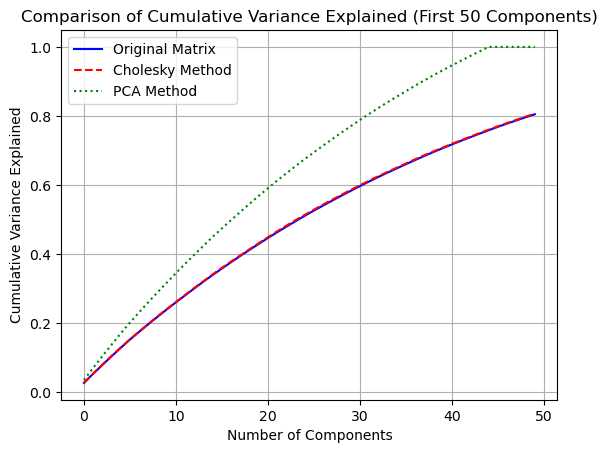

In [ ]:
plot_cumulative_variance()


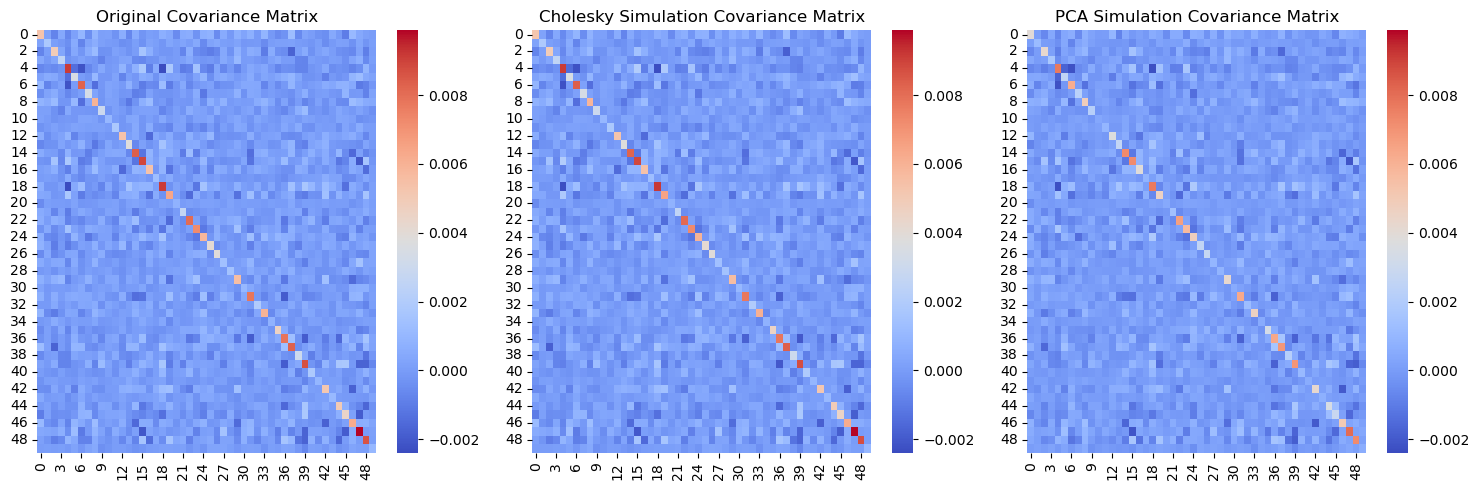

In [38]:
plot_covariance_heatmaps()

The cholesky method keep the same covariance structures as the original data, because it overlaps the original matrix curve. The Cholesky better maintains the original data's complexity and correlation structure. 

The PCA method shows the fatest growth in cumulative variance explained, reaching nearly 100% with about 40 components. Because PCA is used for the dimension reduction, it appears to concentrate the data variance more aggresively. For dimensionality reduction or data compression purposes, the PCA method might be more suitable as it explains more variance with fewer components

#  E. Compare the time it took to run both simulations

In [41]:
print(f"The runtime of PCA is {pca_time:.04f} seconds.")
print(f"The runtime of Cholesky method is {chol_time:.04f} seconds.")

The runtime of PCA is 0.3297 seconds.
The runtime of Cholesky method is 0.5651 seconds.


The PCA method can process the simulation faster than the Cholesky method. 

# F. Discuss the tradeoffs between the two methods

From the perspective of time, the PCA is faster than the Cholesky. This difference is much more obvious when the data set size is bigger. Moreover, the calculation of Cholesky roots and covariance are easily to crash the Python kernel, which means it may need more computility or memory to calculate. 


From the perspective of Frobenius norm and cumulative variance explanation, the PCA and Cholesky has their own advantages. 

The PCA can reduce the dimensions, making the date more concentrated and aggregated. The data structure of PCA simulation is more simple. It needs less components to ccontribute to higher variance explanation. However, the reduction of dimensions also leads to the loss of original information.This might increase the difference between the original data and simulation data.  

The Cholesky can keep the data structure as the original data. The simulation data also similar to the origianl one. However, the data structure of it maybe more complex. It also needs more components to contribute to the variance. 

Hence, when it comes to rapid data processing or preliminary data exploration, PCA offers a more efficient approach, providing a good balance between computational speed and variance explanation. For risk management or other purposes, the Cholesky method would be preferable as it better preserves the risk structure.
